Fraction of hours when ambient air is suitable for Natural Convection

In [ ]:
# importing the liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset
dataset = pd.read_csv("Dataset_2.csv")
k_dbt = dataset.iloc[:,0] #stores hourly dry bulb temperature
k_rh = dataset.iloc[:,1]  # stores hourly relative humidity
bb_dbt = dataset.iloc[:,2]
bb_rh = dataset.iloc[:,3]
v_dbt = dataset.iloc[:,4]
v_rh = dataset.iloc[:,5]
h_dbt = dataset.iloc[:,6]
h_rh = dataset.iloc[:,7]
c_dbt = dataset.iloc[:,8]
c_rh = dataset.iloc[:,9]
p_dbt = dataset.iloc[:,10]
p_rh = dataset.iloc[:,11]
s_dbt = dataset.iloc[:,12]
s_rh = dataset.iloc[:,13]
a_dbt = dataset.iloc[:,14]
a_rh = dataset.iloc[:,15]

In [ ]:
# creating function that will arrange data for bar graph

def check_condition (drybulb_temp , rel_humidity):
  hour_arrange = np.array([0,0,0,0])
  for i in range (0,8760):
    if drybulb_temp[i]>=15 and drybulb_temp[i]<=28:
      if rel_humidity[i] <= 70:
        hour_arrange[0] += 1
        #favourable hours
      else:
        hour_arrange[1] +=1
        # extra humidity hours
    elif drybulb_temp[i] < 15 :
      hour_arrange[2] += 1
      # cold hours
    elif drybulb_temp[i]>28:
      hour_arrange[3] += 1
      # hot hours
    else:
      pass
  return (hour_arrange)

In [ ]:
k_hours = check_condition(k_dbt , k_rh)
bb_hours = check_condition(bb_dbt , bb_rh)
v_hours = check_condition(v_dbt , v_rh)
h_hours = check_condition(h_dbt , h_rh)
c_hours = check_condition(c_dbt , c_rh)
p_hours = check_condition(p_dbt , p_rh)
s_hours = check_condition(s_dbt , s_rh)
a_hours = check_condition(a_dbt , a_rh)
cities = np.array(['Kolkata','Bhubnshwr','Vizag','Hyderabad','Chennai','Pune','Surat', 'Ahmedabad'])

In [ ]:
#def normalize_hours (city_hour):
#  fractional_hours = np.array([0,0,0,0])
#  for i in range (0,4):
#    fractional_hours[i]= (city_hour[i])/8760
#  return fractional_hours

In [ ]:
#k_hours = normalize_hours(k_hours)
#print(k_hours)

In [ ]:
print(k_hours)

[1207 3937  259 3357]


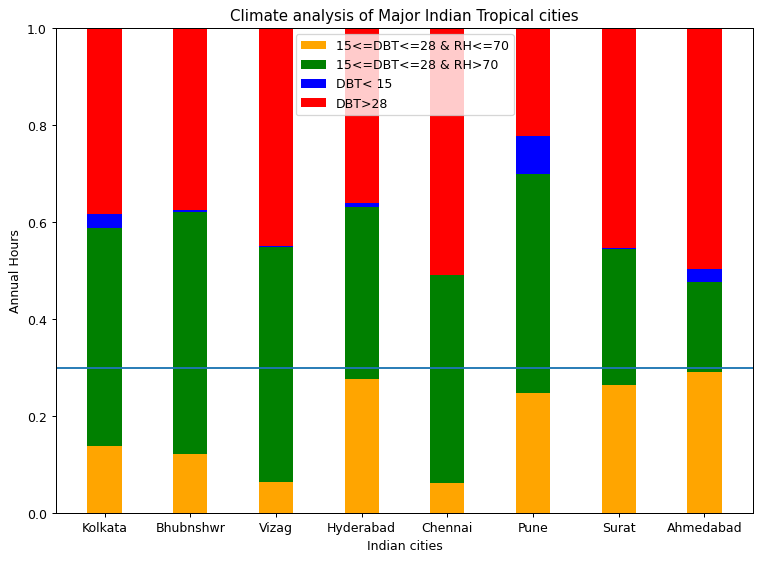

In [ ]:
# Plotting the results obtained

fav_hour = np.array([k_hours[0]/8760,bb_hours[0]/8760, v_hours[0]/8760, h_hours[0]/8760,c_hours[0]/8760,p_hours[0]/8760,s_hours[0]/8760,a_hours[0]/8760])
humid_hour = np.array([k_hours[1]/8760,bb_hours[1]/8760, v_hours[1]/8760, h_hours[1]/8760,c_hours[1]/8760,p_hours[1]/8760,s_hours[1]/8760,a_hours[1]/8760])
cold_hour = np.array([k_hours[2]/8760,bb_hours[2]/8760, v_hours[2]/8760, h_hours[2]/8760,c_hours[2]/8760,p_hours[2]/8760,s_hours[2]/8760,a_hours[2]/8760])
hot_hour = np.array([k_hours[3]/8760,bb_hours[3]/8760, v_hours[3]/8760, h_hours[3]/8760,c_hours[3]/8760,p_hours[3]/8760,s_hours[3]/8760,a_hours[3]/8760])

cold_bottom = np.add(fav_hour,humid_hour)
hot_bottom = np.add(cold_bottom,cold_hour)

width = 0.4
fig = plt.subplots(figsize =(10, 7), dpi =90)
p1 = plt.bar(cities, fav_hour, width, color = 'orange')
p2 = plt.bar(cities, humid_hour, width, bottom = fav_hour, color = 'green')
p3 = plt.bar(cities, cold_hour, width,bottom = cold_bottom, color = 'blue')
p4 = plt.bar(cities, hot_hour, width, bottom = hot_bottom, color = 'red')
plt.axhline(y = 0.3,label="Threshold")
plt.ylabel("Annual Hours")
plt.xlabel("Indian cities")
plt.title("Climate analysis of Major Indian Tropical cities")
plt.ylim(0,1)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('15<=DBT<=28 & RH<=70', '15<=DBT<=28 & RH>70', 'DBT< 15', 'DBT>28'))
plt.show()

In [ ]:
def hot_hours (city_hourly_dbt):
  hot_temp = 0
  for i in range (0, 8760):
    if city_hourly_dbt[i] >28:
      hot_temp += 1
    else:
      pass
  return(hot_temp)
# this function will calculate the number of hours when ambient dry bulb is more than 28`C

In [ ]:
k_hot = hot_hours(k_dbt)
b_hot = hot_hours(bb_dbt)
v_hot = hot_hours(v_dbt)
h_hot = hot_hours(h_dbt)
c_hot = hot_hours(c_dbt)
p_hot = hot_hours(p_dbt)
s_hot = hot_hours(s_dbt)
a_hot = hot_hours(a_dbt)


In [ ]:
# plotting the results
city_hot_hours = np.array([k_hot,b_hot,v_hot,h_hot,c_hot,p_hot,s_hot,a_hot])

plt.figure(figsize=(10,7), dpi =90)
plt.bar(cities,city_hot_hours, color = 'crimson', width=0.4 )
plt.ylabel("Annual Hours")
plt.xlabel("Indian cities")
plt.title("Count of annual hours with T > 28`C")
plt.show()

In [ ]:
def chill_hours (city_hourly_dbt):
  chill_temp = 0
  for i in range (0, 8760):
    if city_hourly_dbt[i] <= 18:
      chill_temp += 1
    else:
      pass
  return(chill_temp)
# this function will calculate the number of hours when ambient dry bulb is less than 18`C

In [ ]:
k_cold = chill_hours(k_dbt)
b_cold = chill_hours(bb_dbt)
v_cold = chill_hours(v_dbt)
h_cold = chill_hours(h_dbt)
c_cold = chill_hours(c_dbt)
p_cold = chill_hours(p_dbt)
s_cold = chill_hours(s_dbt)
a_cold = chill_hours(a_dbt)

In [ ]:
# plotting the results
city_cold_hours = np.array([k_cold,b_cold,v_cold,h_cold,c_cold,p_cold,s_cold,a_cold])

plt.figure(figsize=(10,7), dpi =80)
plt.bar(cities,city_cold_hours, color = 'cyan', width=0.4 )
plt.ylabel("Annual Hours")
plt.xlabel("Indian cities")
plt.title("Count of annual hours with T <= 18`C")
plt.show()